In [1]:
import numpy as np
import redback
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from redback.transient_models.afterglow_models import tophat_redback, tophat, tophat_from_emulator

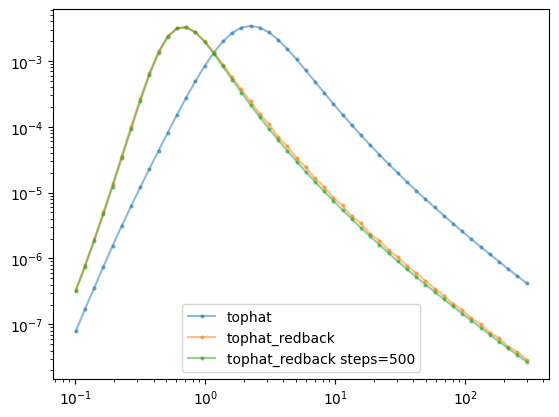

In [74]:
params={}
params['av'] = 0.5
params['loge0'] = 51.0
params['logn0'] = 0.5 
params['p'] = 2.3
params['logepse'] = -1.25
params['logepsb'] = -2.5
params['g0'] = 1000
params['thv']= 0.3
params['thc'] = 0.03
params['base_model']='tophat_from_emulator'
params['frequency']=3.45e14
params['output_format']='flux_density'


#time= np.linspace(0.1,50,200)
time= np.logspace(3.94,7.41,50)/86400
flux1 = tophat_from_emulator(time, **params)
params['base_model']='tophat'
flux2 = tophat(time, **params, redshift=0.01, ksin=1)
params['base_model']='tophat_redback'
flux3=  tophat_redback(time, **params, redshift=0.01, xiN=1)
params['steps']=500
flux4=  tophat_redback(time, **params, redshift=0.01, xiN=1)

ax=plt.subplot()
#ax.loglog(time,flux1, label='emulator',marker='o', markersize=2)
ax.loglog(time,flux2, label='tophat', alpha=0.5,marker='o', markersize=2)
ax.loglog(time,flux3, label='tophat_redback', alpha=0.5,marker='o', markersize=2)
ax.loglog(time,flux4, label='tophat_redback steps=500', alpha=0.5,marker='o', markersize=2)
plt.legend()

#plt.ylim(10e-11,10e-3)
plt.show()

In [9]:
%%time
flux3=  tophat_redback(time, **params, redshift=0.01, xiN=1)

CPU times: user 40.2 ms, sys: 10.1 ms, total: 50.2 ms
Wall time: 47.8 ms


In [10]:
%%time
flux2 = tophat(time, **params, redshift=0.01, ksin=1)

CPU times: user 1.35 ms, sys: 2.88 ms, total: 4.23 ms
Wall time: 4.29 ms
